In [32]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_datasets as tfds
import random
from numba import cuda

tf.keras.backend.clear_session()

print(tf.__version__)

2.2.0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train_images,y_train_labels), (X_test_images,y_test_labels) = mnist.load_data()

In [7]:
X_train_images = np.array(X_train_images) / 255.0
X_test_images = np.array(X_test_images) / 255.0

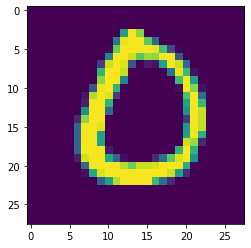

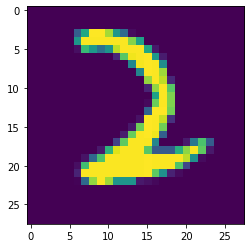

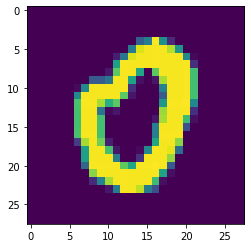

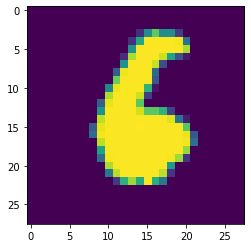

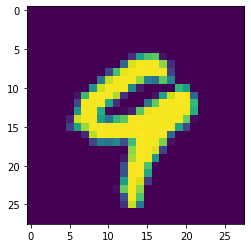

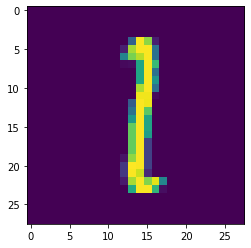

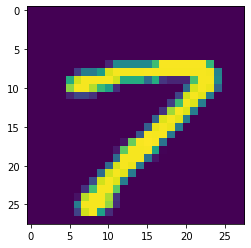

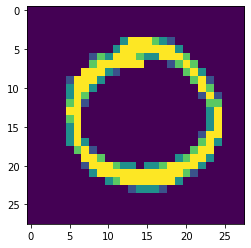

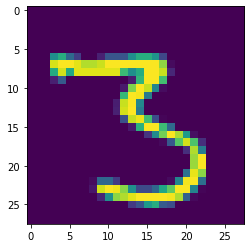

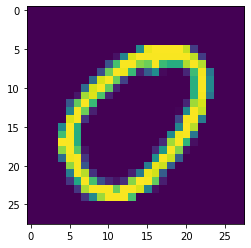

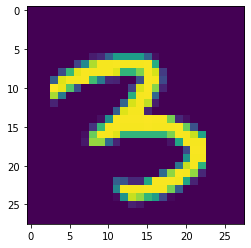

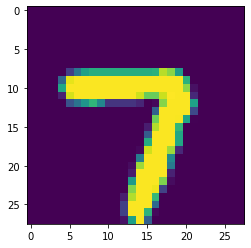

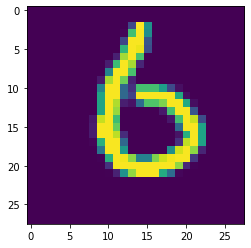

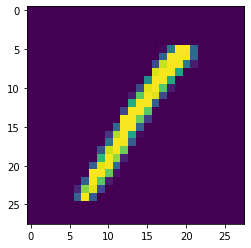

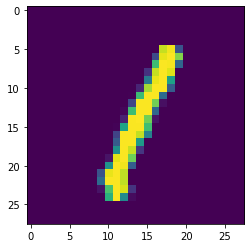

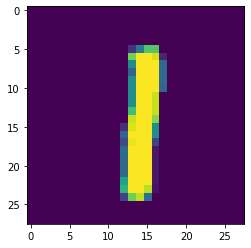

In [19]:
for y in range(4):
    for grid in range(4):
        plt.figure()
        plt.imshow(X_train_images[random.randint(0,(len(X_train_images)))])
    






In [21]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])


In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])


In [28]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if logs.get('acc')>0.99:
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [29]:
callbacks = MyCallback()

In [30]:
history = model.fit(X_train_images,y_train_labels,epochs=15,callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2583 - acc: 0.9257
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1149 - acc: 0.9657
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0790 - acc: 0.9764
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0599 - acc: 0.9817
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - acc: 0.9861
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - acc: 0.9893
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - acc: 0.9916


In [31]:
model.evaluate(X_test_images,y_test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0762 - acc: 0.9795


[0.07620585709810257, 0.9794999957084656]

In [34]:
cuda.close()